In [1]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

from sklearn import preprocessing
# import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
import joblib
import pickle
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv("../datasets/service.csv", sep=";")


In [3]:
df = df.astype("int64")
df.type.value_counts()

1    199
0    199
Name: type, dtype: int64

In [4]:
df.shape

(398, 331)

<AxesSubplot: >

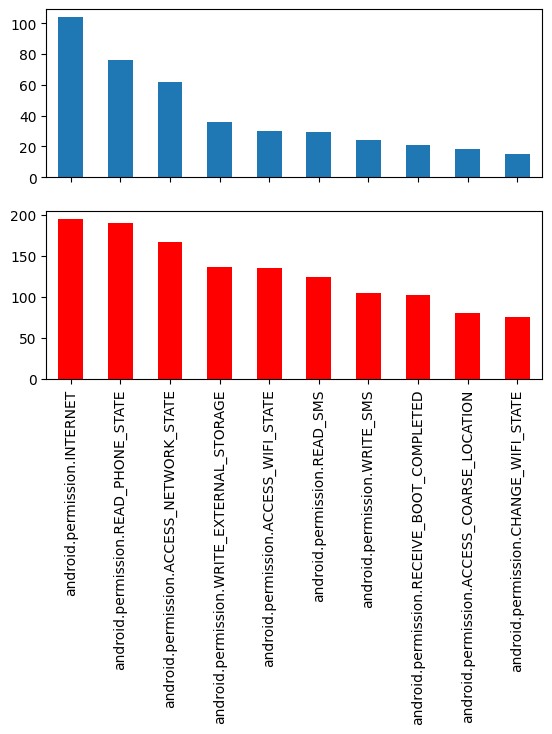

In [5]:
import matplotlib.pyplot as plt
fig, axs =  plt.subplots(nrows=2, sharex=True)

pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10].plot.bar(ax=axs[0])
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="red")

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(feature_vectors,labels,test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:-1], df['type'], test_size=0.2, random_state=42)

In [7]:
X_train.iloc[1:1, :]

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission


In [8]:
# Naive Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None))

naive_bayes
0.8375
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        41
           1       0.78      0.92      0.85        39

    accuracy                           0.84        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.84      0.84        80



In [9]:
# kneighbors algorithm

for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    # accuracy
    accuracy = accuracy_score(pred, y_test)
    print("kneighbors {}".format(i))
    print(accuracy)
    print(classification_report(pred, y_test, labels=None))
    print("")

kneighbors 3
0.8875
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.85      0.95      0.90        41

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80


kneighbors 6
0.85
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.78      0.95      0.86        38

    accuracy                           0.85        80
   macro avg       0.86      0.85      0.85        80
weighted avg       0.87      0.85      0.85        80


kneighbors 9
0.8625
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        41
           1       0.80      0.95      0.87        39

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg  

In [10]:
#Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))


DecisionTreeClassifier()
0.9375
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       0.91      0.98      0.94        43

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80



In [11]:
#Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))


RandomForestClassifier()
0.9125
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        39
           1       0.87      0.98      0.92        41

    accuracy                           0.91        80
   macro avg       0.92      0.91      0.91        80
weighted avg       0.92      0.91      0.91        80



In [12]:
from colorama import Fore
from tabulate import tabulate

j = 0
print(f"Test Sample Size : {len(X_test)}")
print('\033[07m {} \033[0m'.format("Model=>Random Forest Classifier"))
list = []
for i in X_test.index:
    each = []
    actualPred = "malicious" if pred[j] == 1 else "benign"
    expectedPred = "malicious" if y_test.get(j) == 1 else "benign"
    color = Fore.GREEN if actualPred == expectedPred else Fore.RED
    # print(color + f"App Name: {i} Expected : {expectedPred} Actual: {actualPred}")
    each.append(color + f"{i}")
    each.append(color + f"{expectedPred}")
    each.append(color + f"{actualPred}")
    list.append(each)
    j = j + 1
        
print(tabulate(list, headers=['AppName', 'Expected', 'Actual']))

Test Sample Size : 80
 Model=>Random Forest Classifier 
  AppName  Expected    Actual
---------  ----------  ---------
      198  malicious   malicious
      396  benign      benign
       33  benign      benign
      208  benign      benign
       93  benign      malicious
       84  malicious   malicious
      373  benign      benign
       94  benign      malicious
      222  benign      benign
      126  malicious   malicious
        9  benign      malicious
      383  benign      benign
       56  benign      malicious
       72  benign      malicious
      132  benign      malicious
       42  malicious   malicious
      370  benign      benign
      275  benign      benign
      229  benign      benign
      377  benign      benign
       77  benign      malicious
       15  benign      benign
      389  malicious   benign
      238  benign      benign
        0  benign      malicious
      394  malicious   benign
      114  benign      malicious
      234  benign      benign
  

In [13]:
models = [RandomForestClassifier,DecisionTreeClassifier,KNeighborsClassifier,AdaBoostClassifier,SGDClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
model = []
for m in models:
    model_name = type(m()).__name__
    print('Model =>\033[07m {} \033[0m'.format(type(m()).__name__))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    model.append(model_name)
    print('Test Accuracy :\033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))


Model => RandomForestClassifier 
Test Accuracy :  91.25000%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.98      0.87      0.92        46

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

Model => DecisionTreeClassifier 
Test Accuracy :  93.75000%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.98      0.91      0.94        46

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

Model => KNeighborsClassifier 
Test Accuracy :  85.00000%  
              Classification_report 
              precision    recall  f1-score   suppo

In [14]:
model = pd.Series(model, name='Model').astype(str)
accuracy = pd.Series(accuracy_test, name='Accuracy')
output = pd.concat([model, accuracy], axis=1)

In [15]:
output

,Model,Accuracy
0,RandomForestClassifier,0.9125
1,DecisionTreeClassifier,0.9375
2,KNeighborsClassifier,0.8500
3,AdaBoostClassifier,0.9500
4,SGDClassifier,0.9000
5,ExtraTreesClassifier,0.9125
6,GaussianNB,0.8375
